<a href="https://colab.research.google.com/github/maxashoka3/EDA---Play-Store-App/blob/main/EDA_on_Play_Store_App_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Exploratory Data Analysis on Play Store App Review


##### **Project Type**    - EDA
##### **Contribution**    - Individual


# **Project Summary -**

Google Play Store
 
  ---
 
 
  Google Play store is a digital distribution service operated and developed by Google. so it is the one place to find, enjoy and shape apps, Music, Movies and Books - Instantly anywhere across the web & android devices. It was initially launched in October 2008 under the name Android Market but now it has become Google's official app store. Google Play is rapidly published to over 2.5 billion active android devices and it helps the developer, content maker and user to grow a global audience for the app and games and earn revenue.
The Play Store App helps to:
* Reach:
  Google Play helps to reach over 2.5 billion active android devices, including phones, tablets, watches, cars and TVs.
* Security:
  Protects your apps and games and protects users with the play Integrity API
* Monetization:
  Sell digital subscriptions and in-app content in 135 countries with hundreds of payment methods on our safe and trusted commerce platform.
* Quality:
  Monitor app behaviour metrics to help fix issues that affect app and game quality, like crashes, unresponsive apps, and app behaviour that drains battery life.
 
---
 
We have used different libraries to perform this project. We have used NumPy for comprehensive mathematical functions. We have used pandas for the fast, flexible, powerful and easy-to-use open-source data analysis and manipulation tool. And we have used seaborn and matplotlib for the high-level interface for drawing attractive and informative statistical graphics. We have used the word cloud library to generate visualization for representing text data in which the size of each word indicates its frequency or importance.
 
In this project, we have two datasets. They are play store datasets and User reviews and they contain lots of noise, wrong format and have lots of errors and irregularities. So we have gone through several preprocessing, and data cleaning. We removed Null values and presented our field in a particular format so that it can be readable and be used to further processing. After then we move to data visualization and data analysis. We perform many Univariate analyses, bivariate analyses, tri-variate analyses and even multivariate analyses. 
 
There are lots of visualizations that have been used in this EDA project such as word cloud plot, lamlot, barplot, swarm plot, scatter plot, donut graph, line plot, and heat map. Most of them are plotted in a single axis but some of them have multiple axes in the plot, some of them have used the reverse axis, and graphs/charts have been used vertically and horizontally.
From this graph, we tried to build storytelling through visualization and exploring these datasets. We focus mainly on finding the relationship between every variable for the sentiment analysis of that particular app or category



# **GitHub Link -**

Link of [Github](https://github.com/maxashoka3/EDA---Play-Store-App/blob/main/EDA_on_Play_Store_App_Review.ipynb)

# **Problem Statement**


The Play Store app data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market.
Each app (row) has values for the category, rating, size, and more. Another dataset contains customer reviews of the android apps.
Explore and analyze the data to discover key factors responsible for app engagement and success.
 
 
 
### Description of App Dataset columns
 
---
```
* App: The name of the app
* Category: The category of the app
* Rating: The rating of the app in the Play Store
* Reviews: The number of reviews of the app
* Size: The size of the app
* Install: The number of installs of the app
* Type: The type of the app (Free/Paid)
* Price: The price of the app (0 if it is Free)
* Content Rating: The appropriate target audience of the app
* Genres: The genre of the app
* Last Updated: The date when the app was last updated
* Current Ver: The current version of the app
* Android Ver: The minimum Android version required to run the app
```
---
       
### The contents of User Reviews are:
 
---
```
1. App: It contains the name of the app with a short description (optional).
2. Translated_Review: It contains the English translation of the review given by the user of the app.
3. Sentiment: It gives the attitude/emotion of the writer.
 It can be ‘Positive’, ‘Negative’, or ‘Neutral’.
4. Sentiment_Polarity: It gives the polarity of the review.
 Its range is [-1,1], where 1 means a Positive statement’ and -1 means a ‘Negative statement’.
5. Sentiment_Subjectivity: This value gives how close a reviewer’s opinion is to the opinion of the general public.
Its range is [0,1]. The higher the subjectivity, the closer is the reviewer’s opinion to the opinion of the general public, and lower subjectivity indicates the review is more a piece of factual information.
```
---
 





#### **Define Your Business Objective?**



* To Perform EDA

* To perform the Sentiment Analysis

* Best app and Category to develop

* Best App to earn more 


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [122]:
# Import Libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# for worldcloud puzzle
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')


In [123]:
# Mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset Loading

In [124]:
# Load Dataset
store_df = pd.read_csv("/content/drive/MyDrive/AlmaBetter/Play Store App Review Analysis/Play Store Data.csv")
review_df = pd.read_csv("/content/drive/MyDrive/AlmaBetter/Play Store App Review Analysis/User Reviews.csv")

### Dataset First View

In [125]:
# first 5 records
store_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [126]:
# watching the random sample of the store dataset
store_df.sample(20)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
889,Twitch: Livestream Multiplayer Games & Esports,ENTERTAINMENT,4.6,2133296,Varies with device,"50,000,000+",Free,0,Teen,Entertainment,"July 31, 2018",Varies with device,Varies with device
9781,Fill 'er Up,TRAVEL_AND_LOCAL,3.2,58,18k,"5,000+",Free,0,Everyone,Travel & Local,"February 27, 2017",1.1,1.6 and up
7151,Sonic CD Classic,GAME,4.6,26138,15M,"1,000,000+",Free,0,Everyone,Action,"February 14, 2018",1.0.2,4.2 and up
4807,Rope Hero 3,GAME,4.4,45871,99M,"5,000,000+",Free,0,Teen,Action,"May 8, 2017",1.6,2.3 and up
3632,MyRadar NOAA Weather Radar,WEATHER,4.5,178934,Varies with device,"10,000,000+",Free,0,Everyone,Weather,"August 4, 2018",Varies with device,Varies with device
7278,Azulones Getafe CF Fans,SPORTS,NaN,4,7.8M,100+,Free,0,Teen,Sports,"March 25, 2017",2.3.11,2.3.3 and up
1799,Word Link,GAME,4.6,216675,30M,"10,000,000+",Free,0,Everyone,Word,"August 1, 2018",2.2.7,4.1 and up
2849,YouCam Perfect - Selfie Photo Editor,PHOTOGRAPHY,4.5,1579287,Varies with device,"100,000,000+",Free,0,Everyone,Photography,"July 25, 2018",Varies with device,Varies with device
6505,BN Pro BlueICS-b HD Text,LIBRARIES_AND_DEMO,4.2,78,812k,"10,000+",Free,0,Everyone,Libraries & Demo,"February 5, 2017",2.3.2,1.6 and up
432,PHONE for Google Voice & GTalk,COMMUNICATION,4.3,72065,13M,"1,000,000+",Free,0,Everyone,Communication,"April 18, 2018",3.0.7,4.0 and up


In [127]:
# watching the first 5 record of the rating dataset
review_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [128]:
# viewing the top 20 records to the rating dataset
review_df.sample(20)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
9178,Asana: organize team projects,NaN,NaN,NaN,NaN
35382,Dog Sim Online: Raise a Family,NaN,NaN,NaN,NaN
60761,Helix Jump,"Simple, fun, addictive asks well made game. So...",Positive,0.085714,0.493878
62160,"Hily: Dating, Chat, Match, Meet & Hook up",Every messaged sends links cant people want ch...,Neutral,0.000000,0.000000
29521,Couch to 10K Running Trainer,First three days done. Hoping 10k September . ...,Positive,0.350000,0.644444
8302,Apartment Decorating Ideas,NaN,NaN,NaN,NaN
33640,Despegar.com Hoteles y Vuelos,Why I get charged $200 USD booking $3000 fligh...,Neutral,0.000000,0.000000
61133,Hello Kitty Nail Salon,"I think game too, many ads. I probably go 5 ad...",Positive,0.100000,0.460000
34303,Die TK-App – alles im Griff,Is English version?? Would helpful,Neutral,0.000000,0.000000
25489,Checkout 51: Grocery coupons,I love I go I go shopping. It reminds things I...,Positive,0.227778,0.561111


### Dataset Rows & Columns count

In [129]:
# Dataset Rows & Columns count
print(f"Store_df: \n The number of rows  is {store_df.shape[0]} \n The column  is{store_df.shape[1]}")

print(f"Rating_df: \n The number of rows  is {review_df.shape[0]} \n The column in user review is{review_df.shape[1]}")

Store_df: 
 The number of rows  is 10841 
 The column  is13
Rating_df: 
 The number of rows  is 64295 
 The column in user review is5


### Dataset Information

In [130]:
# Dataset Info
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


From here only we can tell that except the App column every column has around 40% Null values present in the rating dataset.
 



In [131]:
# Dataset Info
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


It can be observed that many rows have a lot of missing or null values.
 



#### Duplicate Values

In [132]:
# Dataset Duplicate Value Count
store_df.duplicated().value_counts()

False    10358
True       483
dtype: int64

483 rows are duplicates.So It needs to be removed.
 



In [133]:
# number of duplicate value
review_df.duplicated().value_counts()

True     33616
False    30679
dtype: int64

More than half of the rows have duplicate values. It is needed to remove the duplicate values in the dataset as it may cause the bias in the analysis
 



In [134]:
# removing the duplicate value from the both dataset
review_df.drop_duplicates(inplace = True)
store_df.drop_duplicates(inplace = True)

We have completely removed the duplicates values
 



#### Missing Values/Null Values

In [135]:
# Missing Values/Null Values Count in the rating dataset
print(review_df.isnull().sum())

App                         0
Translated_Review         987
Sentiment                 982
Sentiment_Polarity        982
Sentiment_Subjectivity    982
dtype: int64


In [136]:
# Missing Values/Null Values Count in the rating dataset
print(store_df.isnull().sum())

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


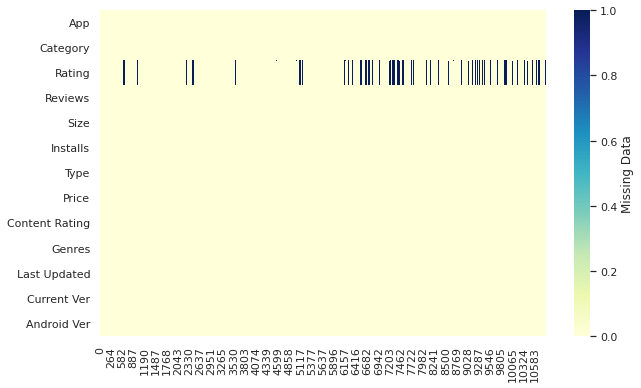

In [137]:
# Visualizing the missing values
plt.figure(figsize=(10,6))
sns.heatmap(store_df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

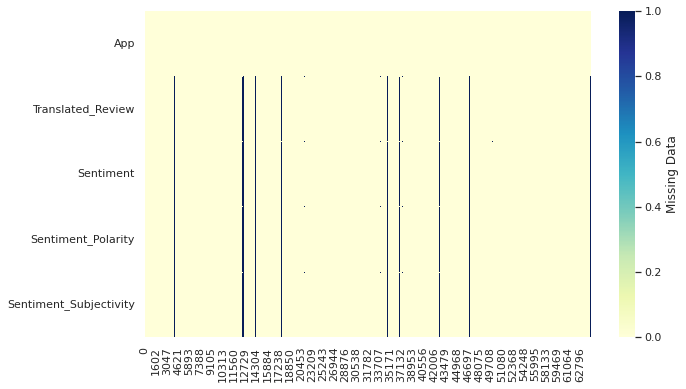

In [138]:
# Visualizing the missing values
plt.figure(figsize=(10,6))
sns.heatmap(review_df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

### What did you know about your dataset?

We are working with two datasets.
 
  * Play Store 
  * User Reviews
 
* In the play store dataset we have 10841 numbers of rows and 13 columns. 
* We have missing values in Rating, Type, Content Rating and Android ver. 
* It has 483 duplicate values present in the play store data 
* Column Reviews, Size, Installs and Price are the wrong type as they must be of the numeric type.
* Size is represented as the string with the value concatenated M and K as the end character.
* Price values have the symbol '$' in the end.
* Install has the character '+' at the end of the string.
 
In User Reviews, We have 64296 numbers of rows and 5 columns. It has a 30679 number of null/missing values in all the columns except the App.
All the duplicates values have been removed
 
 



## ***2. Understanding Your Variables***

### Variables Description 

In [139]:
# Dataset Describe
review_df.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,29697.000000,29697.000000
mean,0.188836,0.490848
std,0.355672,0.266029
min,-1.000000,0.000000
25%,0.000000,0.350000
50%,0.157143,0.514286
75%,0.422500,0.652500
max,1.000000,1.000000


In [140]:
# Dataset Describe
store_df.describe()

,Rating
count,8893.000000
mean,4.189542
std,0.545452
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


## 3. ***Data Wrangling***

### Data Wrangling Code

#### Store Review

In [141]:
# Lets make copy of store dataset 
df= store_df.copy()

##### Category

In [142]:
# viewing the unique values of the category

df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

The category has a '1.9' value. so let's check this value
 



In [143]:
#taking the look at category with value 1.9
df[df['Category'] == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [144]:
# deleting that rows
df = df[df['Category'] != '1.9']

##### App

In [145]:
# viewing the unique values of App 
df['App'].unique().tolist()

['Photo Editor & Candy Camera & Grid & ScrapBook',
 'Coloring book moana',
 'U Launcher Lite – FREE Live Cool Themes, Hide Apps',
 'Sketch - Draw & Paint',
 'Pixel Draw - Number Art Coloring Book',
 'Paper flowers instructions',
 'Smoke Effect Photo Maker - Smoke Editor',
 'Infinite Painter',
 'Garden Coloring Book',
 'Kids Paint Free - Drawing Fun',
 'Text on Photo - Fonteee',
 'Name Art Photo Editor - Focus n Filters',
 'Tattoo Name On My Photo Editor',
 'Mandala Coloring Book',
 '3D Color Pixel by Number - Sandbox Art Coloring',
 'Learn To Draw Kawaii Characters',
 'Photo Designer - Write your name with shapes',
 '350 Diy Room Decor Ideas',
 'FlipaClip - Cartoon animation',
 'ibis Paint X',
 'Logo Maker - Small Business',
 "Boys Photo Editor - Six Pack & Men's Suit",
 'Superheroes Wallpapers | 4K Backgrounds',
 'Mcqueen Coloring pages',
 'HD Mickey Minnie Wallpapers',
 'Harley Quinn wallpapers HD',
 'Colorfit - Drawing & Coloring',
 'Animated Photo Editor',
 'Pencil Sketch Drawing',

In [146]:
# defining function to remove the extra description or slogans
def App_name_only(char_code,df):
  for chr in char_code:
    df['App'] = df['App'].apply(lambda x: x.split(chr,1)[0] if chr in x else x)


In [147]:
#These code are differnt though some may look similar
special_code = ['-','—',"(","|","/","–","(",":",]

#Function is applied
App_name_only(special_code,df)
df['App'].unique().tolist()

['Photo Editor & Candy Camera & Grid & ScrapBook',
 'Coloring book moana',
 'U Launcher Lite ',
 'Sketch ',
 'Pixel Draw ',
 'Paper flowers instructions',
 'Smoke Effect Photo Maker ',
 'Infinite Painter',
 'Garden Coloring Book',
 'Kids Paint Free ',
 'Text on Photo ',
 'Name Art Photo Editor ',
 'Tattoo Name On My Photo Editor',
 'Mandala Coloring Book',
 '3D Color Pixel by Number ',
 'Learn To Draw Kawaii Characters',
 'Photo Designer ',
 '350 Diy Room Decor Ideas',
 'FlipaClip ',
 'ibis Paint X',
 'Logo Maker ',
 'Boys Photo Editor ',
 'Superheroes Wallpapers ',
 'Mcqueen Coloring pages',
 'HD Mickey Minnie Wallpapers',
 'Harley Quinn wallpapers HD',
 'Colorfit ',
 'Animated Photo Editor',
 'Pencil Sketch Drawing',
 'Easy Realistic Drawing Tutorial',
 'Pink Silver Bow Keyboard Theme',
 'Art Drawing Ideas',
 'Anime Manga Coloring Book',
 'Easy Origami Ideas',
 'I Creative Idea',
 'How to draw Ladybug and Cat Noir',
 'UNICORN ',
 'Floor Plan Creator',
 'PIP Camera ',
 'How To Color D

In [148]:
# viewing the unique values of App 
df['App'].unique().tolist()

['Photo Editor & Candy Camera & Grid & ScrapBook',
 'Coloring book moana',
 'U Launcher Lite ',
 'Sketch ',
 'Pixel Draw ',
 'Paper flowers instructions',
 'Smoke Effect Photo Maker ',
 'Infinite Painter',
 'Garden Coloring Book',
 'Kids Paint Free ',
 'Text on Photo ',
 'Name Art Photo Editor ',
 'Tattoo Name On My Photo Editor',
 'Mandala Coloring Book',
 '3D Color Pixel by Number ',
 'Learn To Draw Kawaii Characters',
 'Photo Designer ',
 '350 Diy Room Decor Ideas',
 'FlipaClip ',
 'ibis Paint X',
 'Logo Maker ',
 'Boys Photo Editor ',
 'Superheroes Wallpapers ',
 'Mcqueen Coloring pages',
 'HD Mickey Minnie Wallpapers',
 'Harley Quinn wallpapers HD',
 'Colorfit ',
 'Animated Photo Editor',
 'Pencil Sketch Drawing',
 'Easy Realistic Drawing Tutorial',
 'Pink Silver Bow Keyboard Theme',
 'Art Drawing Ideas',
 'Anime Manga Coloring Book',
 'Easy Origami Ideas',
 'I Creative Idea',
 'How to draw Ladybug and Cat Noir',
 'UNICORN ',
 'Floor Plan Creator',
 'PIP Camera ',
 'How To Color D

In [149]:
# Check if there are different App of the type
df['App'].value_counts()

G                  15
F                  13
CX                 11
K                  10
T                   9
                   ..
Psiphon Pro         1
The Maze Runner     1
O Multiple          1
Pixlr               1
iHoroscope          1
Name: App, Length: 9290, dtype: int64

In [150]:
df[df['App']=='Instagram']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2545,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
3909,Instagram,SOCIAL,4.5,66509917,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device


In [151]:
# Lets check these app
df[df['App']=='ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


In [152]:
# let's check another app called '8 Ball Pool'
df[df['App']=='8 Ball Pool']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1675,8 Ball Pool,GAME,4.5,14198297,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1703,8 Ball Pool,GAME,4.5,14198602,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1755,8 Ball Pool,GAME,4.5,14200344,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1844,8 Ball Pool,GAME,4.5,14200550,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1871,8 Ball Pool,GAME,4.5,14201891,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1970,8 Ball Pool,GAME,4.5,14201604,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
3953,8 Ball Pool,SPORTS,4.5,14184910,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up


In [153]:
# let's check another app called '8 Ball Pool'
df[df['App']=='Helix Jump']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1663,Helix Jump,GAME,4.2,1497361,33M,"100,000,000+",Free,0,Everyone,Action,"April 9, 2018",1.0.6,4.1 and up
1749,Helix Jump,GAME,4.2,1498648,33M,"100,000,000+",Free,0,Everyone,Action,"April 9, 2018",1.0.6,4.1 and up
1792,Helix Jump,GAME,4.2,1499373,33M,"100,000,000+",Free,0,Everyone,Action,"April 9, 2018",1.0.6,4.1 and up
1918,Helix Jump,GAME,4.2,1500999,33M,"100,000,000+",Free,0,Everyone,Action,"April 9, 2018",1.0.6,4.1 and up
1969,Helix Jump,GAME,4.2,1500622,33M,"100,000,000+",Free,0,Everyone,Action,"April 9, 2018",1.0.6,4.1 and up
4182,Helix Jump,GAME,4.2,1485806,33M,"100,000,000+",Free,0,Everyone,Action,"April 9, 2018",1.0.6,4.1 and up


We are losing about 3 % of the data as it removes the duplicates values and these duplicated values are also generated while fine-tuning the name but it's fine for the greater good as it gives the crisp and short name instead of it taking slogan or catchy line
 



In [154]:
# Lets remove the duplicate value
df.drop_duplicates(subset='App',inplace = True)


##### Rating

In [155]:
# checking the rating columns
df['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 2.4, 1.8, 1.6, 2.1, 1.4, 1.5,
       1.2])

Here we can see nan and 19 cannot be valued as their rating values range from 1 to 5 only.
 



In [156]:
# getting the missing rating percentage
missing_rating = df['Rating'].isnull().sum()/len(df['Rating']) * 100
print(f"Missing percent is in Rating is {missing_rating}%")

Missing percent is in Rating is 15.005382131324005%


It can be seen that Rating has around 15% of data are null. or It can be said that around 15 % of the users haven't rated the app. So we will remove them.
 



In [157]:
#user not rated the app 
not_rated_user = df['Rating'].isnull().sum()
print(f"The total number of the users has not  rated the is {not_rated_user}")

The total number of the users has not  rated the is 1394


In [158]:
# Removing the rows which contains the null values in the rows.
df.dropna(subset = ['Rating'],inplace = True)

In [159]:
# Removing the rows which has rating '19' as the outliers
df= df[df['Rating'] != 19]

##### Review


In [160]:
df['Reviews'].unique().tolist()

['159',
 '967',
 '87510',
 '215644',
 '167',
 '178',
 '36815',
 '13791',
 '121',
 '13880',
 '8788',
 '44829',
 '4326',
 '1518',
 '55',
 '3632',
 '27',
 '194216',
 '224399',
 '450',
 '654',
 '7699',
 '118',
 '192',
 '20260',
 '203',
 '136',
 '223',
 '1120',
 '227',
 '5035',
 '1015',
 '353',
 '564',
 '8145',
 '36639',
 '158',
 '591',
 '117',
 '176',
 '295221',
 '2206',
 '26',
 '174531',
 '1070',
 '85',
 '845',
 '367',
 '1598',
 '284',
 '17057',
 '129',
 '542',
 '10479',
 '805',
 '1403',
 '3971',
 '534',
 '7774',
 '38846',
 '2431',
 '6090',
 '295',
 '190',
 '40211',
 '356',
 '52530',
 '116986',
 '1379',
 '271920',
 '736',
 '7021',
 '197',
 '737',
 '3574',
 '994',
 '197136',
 '142',
 '15168',
 '2155',
 '138',
 '5414',
 '21777',
 '348',
 '250',
 '13372',
 '7880',
 '3617',
 '4806',
 '65786',
 '31433',
 '5097',
 '1754',
 '2680',
 '1288',
 '18900',
 '49790',
 '1150',
 '1739',
 '32090',
 '2225',
 '4369',
 '8572',
 '964',
 '42050',
 '104',
 '17934',
 '601',
 '36',
 '187',
 '30',
 '134',
 '74',
 

In [161]:
#Review's data type is string but it needed to be in the float. 
# converting the review column as the float type
df['Reviews']  = df['Reviews'].apply(int)

##### Size

In [162]:
#unique values of size
df['Size'].unique().tolist()

['19M',
 '14M',
 '8.7M',
 '25M',
 '2.8M',
 '5.6M',
 '29M',
 '33M',
 '3.1M',
 '28M',
 '12M',
 '20M',
 '21M',
 '37M',
 '2.7M',
 '5.5M',
 '17M',
 '39M',
 '31M',
 '4.2M',
 '23M',
 '6.0M',
 '6.1M',
 '4.6M',
 '9.2M',
 '5.2M',
 '11M',
 '24M',
 'Varies with device',
 '9.4M',
 '15M',
 '10M',
 '1.2M',
 '26M',
 '8.0M',
 '7.9M',
 '56M',
 '57M',
 '35M',
 '54M',
 '201k',
 '3.6M',
 '5.7M',
 '8.6M',
 '2.4M',
 '27M',
 '2.5M',
 '7.0M',
 '16M',
 '3.4M',
 '8.9M',
 '3.9M',
 '2.9M',
 '38M',
 '32M',
 '5.4M',
 '18M',
 '1.1M',
 '2.2M',
 '4.5M',
 '9.8M',
 '52M',
 '9.0M',
 '6.7M',
 '30M',
 '2.6M',
 '7.1M',
 '22M',
 '6.4M',
 '3.2M',
 '8.2M',
 '4.9M',
 '9.5M',
 '5.0M',
 '5.9M',
 '13M',
 '73M',
 '6.8M',
 '3.5M',
 '4.0M',
 '2.3M',
 '2.1M',
 '42M',
 '9.1M',
 '55M',
 '23k',
 '7.3M',
 '6.5M',
 '1.5M',
 '7.5M',
 '51M',
 '41M',
 '48M',
 '8.5M',
 '46M',
 '8.3M',
 '4.3M',
 '4.7M',
 '3.3M',
 '40M',
 '7.8M',
 '8.8M',
 '6.6M',
 '5.1M',
 '61M',
 '66M',
 '79k',
 '8.4M',
 '3.7M',
 '118k',
 '44M',
 '695k',
 '1.6M',
 '6.2M',
 '53M

In [163]:
# random 20 values
df['Size'].sample(20)

10500                   15M
2584     Varies with device
324                    9.1M
8966                    15M
1236     Varies with device
4358     Varies with device
1054                    32M
4386                    22M
2994                    30M
10795                  4.0M
1739                    74M
9911                    15M
8869                   7.9M
3083                    25M
6524                   430k
4782     Varies with device
7427                    13M
3448     Varies with device
3426                   3.3M
1336                    12M
Name: Size, dtype: object

Size values have lots of problems
* its data type is a string
* It contains the value "Varies with device"
* Its value contains M for Million & K for thousand at the end of the 
* These values need to be transformed into the right format in the columns.
 



In [164]:
# Replacing the "Varies with device to nan"
df['Size'] = df['Size'].apply(lambda x: str(x).replace("Varies with device",'nan') if 'Varies with device' in str(x) else x)
# Removing the M
df['Size'] = df['Size'].apply(lambda x: str(x).replace('M','') if 'M' in str(x) else x)
# Removing the k and converting the values into float
df['Size'] =  df['Size'].apply(lambda x: float(str(x).replace('k', ""))/1000 if 'k' in str(x) else x)
# changing the Size columns all values to the float
df['Size']=  df['Size'].apply(float)

In [165]:
# Checking again if transformation took place or not
df['Size'].unique().tolist()

[19.0,
 14.0,
 8.7,
 25.0,
 2.8,
 5.6,
 29.0,
 33.0,
 3.1,
 28.0,
 12.0,
 20.0,
 21.0,
 37.0,
 2.7,
 5.5,
 17.0,
 39.0,
 31.0,
 4.2,
 23.0,
 6.0,
 6.1,
 4.6,
 9.2,
 5.2,
 11.0,
 24.0,
 nan,
 9.4,
 15.0,
 10.0,
 1.2,
 26.0,
 8.0,
 7.9,
 56.0,
 57.0,
 35.0,
 54.0,
 0.201,
 3.6,
 5.7,
 8.6,
 2.4,
 27.0,
 2.5,
 7.0,
 16.0,
 3.4,
 8.9,
 3.9,
 2.9,
 38.0,
 32.0,
 5.4,
 18.0,
 1.1,
 2.2,
 4.5,
 9.8,
 52.0,
 9.0,
 6.7,
 30.0,
 2.6,
 7.1,
 22.0,
 6.4,
 3.2,
 8.2,
 4.9,
 9.5,
 5.0,
 5.9,
 13.0,
 73.0,
 6.8,
 3.5,
 4.0,
 2.3,
 2.1,
 42.0,
 9.1,
 55.0,
 0.023,
 7.3,
 6.5,
 1.5,
 7.5,
 51.0,
 41.0,
 48.0,
 8.5,
 46.0,
 8.3,
 4.3,
 4.7,
 3.3,
 40.0,
 7.8,
 8.8,
 6.6,
 5.1,
 61.0,
 66.0,
 0.079,
 8.4,
 3.7,
 0.118,
 44.0,
 0.695,
 1.6,
 6.2,
 53.0,
 1.4,
 3.0,
 7.2,
 5.8,
 3.8,
 9.6,
 45.0,
 63.0,
 49.0,
 77.0,
 4.4,
 70.0,
 9.3,
 8.1,
 36.0,
 6.9,
 7.4,
 84.0,
 97.0,
 2.0,
 1.9,
 1.8,
 5.3,
 47.0,
 0.556,
 0.526,
 76.0,
 7.6,
 59.0,
 9.7,
 78.0,
 72.0,
 43.0,
 7.7,
 6.3,
 0.334,
 93.0,
 65.0,
 79.0,

In [166]:
#describing the Size
df['Size'].describe()


count    6756.000000
mean       21.852839
std        22.758164
min         0.008500
25%         4.900000
50%        13.000000
75%        31.000000
max       100.000000
Name: Size, dtype: float64

In [167]:
# Checking null values
df['Size'].isnull().sum()

1140

In [168]:
# removing the null values from the column 'Size'
df.fillna(df['Size'].mean(),inplace= True)

##### Installs

In [169]:
list(df['Installs'].unique())

['10,000+',
 '500,000+',
 '5,000,000+',
 '50,000,000+',
 '100,000+',
 '50,000+',
 '1,000,000+',
 '10,000,000+',
 '5,000+',
 '100,000,000+',
 '1,000,000,000+',
 '1,000+',
 '500,000,000+',
 '100+',
 '500+',
 '10+',
 '5+',
 '50+',
 '1+']

It contains "+" & "," and string as type so it "+" & "," needed to remove and should converted to int

In [170]:
df['Installs'] = df['Installs'].apply(lambda x : x.replace('+','') if '+' in x else x)
df['Installs'] = df['Installs'].apply(lambda x : x.replace(',' ,'') if ',' in x else x)
df['Installs'] = df['Installs'].apply(int)

In [171]:
df['Installs'].unique().tolist()



[10000,
 500000,
 5000000,
 50000000,
 100000,
 50000,
 1000000,
 10000000,
 5000,
 100000000,
 1000000000,
 1000,
 500000000,
 100,
 500,
 10,
 5,
 50,
 1]

In [172]:
# Checking whether it has NA/Null values
df['Installs'].isnull().sum()

0

##### Type

In [173]:
# Checking the unique values of Type
df['Type'].unique().tolist()

['Free', 'Paid']

##### Price

In [174]:
# unique values of price
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$4.49', '$1.70', '$8.99', '$1.49', '$399.99', '$17.99',
       '$400.00', '$3.02', '$4.84', '$4.77', '$1.61', '$2.50', '$6.49',
       '$1.29', '$299.99', '$379.99', '$37.99', '$18.99', '$389.99',
       '$8.49', '$1.75', '$14.00', '$2.00', '$3.08', '$2.59', '$19.40',
       '$3.90', '$4.59', '$15.46', '$3.04', '$13.99', '$4.29', '$3.28',
       '$4.60', '$1.00', '$2.95', '$2.90', '$1.97', '$2.56', '$1.20'],
      dtype=object)

Price 
* It can be seen from the array that it contains "$". So it needs to be removed
* It is a string type, needs to be converted to float
 



In [175]:
# Removing "$" 
df['Price'] = df['Price'].apply( lambda x: x.replace("$","" ) if "$" in x else x )
# Converting Price values float
df['Price'] = df['Price'].apply(float)

##### Content Rating

In [176]:
# unique values of Content Rating
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

##### Genres

In [177]:
# Uniques values of Genres
df['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Comics;Creativity',
       'Communication', 'Dating', 'Education;Education', 'Education',
       'Education;Creativity', 'Education;Music & Video',
       'Education;Action & Adventure', 'Education;Pretend Play',
       'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role Playing', 'Simulation;Education',
 

If we look closer at the values then it is composed of **Genres and sub_genres** separated by **;**. So we will be making the two new columns whose first part will be Genres and the other part will be sub_genres
* Genres
* Sub_genres
 



In [178]:
# Triming the Second part sepated by ";"
df['Sub_genres'] =  df['Genres'].apply(lambda x : x.split(";",1)[1] if ';' in x else x)
# Triming the First part sepated by ";"
df['Genres_board'] = df['Genres'].apply(lambda x : x.split(";", 1)[0] if ';' in x else x)

In [179]:
# unique values of the sub_genres
df['Sub_genres'].unique()

array(['Art & Design', 'Pretend Play', 'Creativity', 'Auto & Vehicles',
       'Beauty', 'Books & Reference', 'Business', 'Comics',
       'Communication', 'Dating', 'Education', 'Music & Video',
       'Action & Adventure', 'Brain Games', 'Entertainment', 'Events',
       'Finance', 'Food & Drink', 'Health & Fitness', 'House & Home',
       'Libraries & Demo', 'Lifestyle', 'Arcade', 'Casual', 'Card',
       'Action', 'Strategy', 'Puzzle', 'Sports', 'Music', 'Word',
       'Racing', 'Simulation', 'Adventure', 'Board', 'Trivia',
       'Role Playing', 'Medical', 'Social', 'Shopping', 'Photography',
       'Travel & Local', 'Tools', 'Personalization', 'Productivity',
       'Parenting', 'Weather', 'Video Players & Editors',
       'News & Magazines', 'Maps & Navigation', 'Educational', 'Casino'],
      dtype=object)

In [180]:
# Checking if its updated or not in Genres
df['Genres_board'].unique()

array(['Art & Design', 'Auto & Vehicles', 'Beauty', 'Books & Reference',
       'Business', 'Comics', 'Communication', 'Dating', 'Education',
       'Entertainment', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Adventure', 'Arcade', 'Casual', 'Card', 'Action',
       'Strategy', 'Puzzle', 'Sports', 'Music', 'Word', 'Racing',
       'Simulation', 'Board', 'Trivia', 'Role Playing', 'Educational',
       'Music & Audio', 'Video Players & Editors', 'Medical', 'Social',
       'Shopping', 'Photography', 'Travel & Local', 'Tools',
       'Personalization', 'Productivity', 'Parenting', 'Weather',
       'News & Magazines', 'Maps & Navigation', 'Casino'], dtype=object)

In [181]:
# Checking the random values 
df[['Genres_board','Genres','Sub_genres']].sample(40)

,Genres_board,Genres,Sub_genres
246,Business,Business,Business
4798,Simulation,Simulation,Simulation
7917,Finance,Finance,Finance
7062,Maps & Navigation,Maps & Navigation,Maps & Navigation
1086,Finance,Finance,Finance
6614,Medical,Medical,Medical
6308,Shopping,Shopping,Shopping
7236,Tools,Tools,Tools
9034,Tools,Tools,Tools
9433,Puzzle,Puzzle,Puzzle


##### Last Updated

In [182]:
# unique values of Last Updated
df['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

##### Android Ver, Current Ver

In [183]:
# unique values of Android Ver
df['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up', '3.2 and up',
       '4.4W and up', '5.1 and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', 21.852838735938427, '5.0 - 6.0', '1.0 and up'],
      dtype=object)

In [184]:
# Unique values of Current Ver
df['Current Ver'].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '6.04', '1.5.447', '0.3.4'],
      dtype=object)

##### Checking Category, Genres and Broad Genres to see if they have any relationship

In [185]:
# chekcing random values
df[['Category','Genres','Genres_board']].sample(10)


,Category,Genres,Genres_board
3182,TRAVEL_AND_LOCAL,Travel & Local,Travel & Local
552,DATING,Dating,Dating
2484,MEDICAL,Medical,Medical
7705,FAMILY,Entertainment,Entertainment
1467,HOUSE_AND_HOME,House & Home,House & Home
4159,SPORTS,Sports,Sports
491,DATING,Dating,Dating
4998,SPORTS,Sports,Sports
3219,TRAVEL_AND_LOCAL,Travel & Local;Action & Adventure,Travel & Local
8933,PHOTOGRAPHY,Photography,Photography


They are looking like the same but let's again check their unique values

In [186]:
print(df['Category'].unique().tolist())
print(df['Genres_board'].unique().tolist())
print(df['Genres'].unique().tolist())


['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION', 'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE', 'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL', 'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL', 'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER', 'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION']
['Art & Design', 'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business', 'Comics', 'Communication', 'Dating', 'Education', 'Entertainment', 'Events', 'Finance', 'Food & Drink', 'Health & Fitness', 'House & Home', 'Libraries & Demo', 'Lifestyle', 'Adventure', 'Arcade', 'Casual', 'Card', 'Action', 'Strategy', 'Puzzle', 'Sports', 'Music', 'Word', 'Racing', 'Simulation', 'Board', 'Trivia', 'Role Playing', 'Educational', 'Music & Audio', 'Video Players & Editors', 'Medical', 'Social', 'Shopping', 'Phot

The category is slightly different than the Genres_board but Genres is too much different than the Generes_board and Genres board is a subset of the Genres so we are removing Genres
 



In [187]:
#deleting the Genres columns
df.drop("Genres",inplace = True,axis = 1)

#### User Review

In [188]:
# copying the review dataset 
rdf = review_df.copy()

In [189]:
# columns of user review dataset
rdf.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

##### App

In [190]:
rdf['App'].unique().tolist()

['10 Best Foods for You',
 '104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室',
 '11st',
 '1800 Contacts - Lens Store',
 '1LINE – One Line with One Touch',
 '2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif',
 '21-Day Meditation Experience',
 '2Date Dating App, Love and matching',
 '2GIS: directory & navigator',
 '2RedBeans',
 '2ndLine - Second Phone Number',
 '30 Day Fitness Challenge - Workout at Home',
 '365Scores - Live Scores',
 '3D Blue Glass Water Keyboard Theme',
 '3D Color Pixel by Number - Sandbox Art Coloring',
 '3D Live Neon Weed Launcher',
 '4 in a Row',
 '4K Wallpapers and Ultra HD Backgrounds',
 '591房屋交易-租屋、中古屋、新建案、實價登錄、別墅透天、公寓套房、捷運、買房賣房行情、房價房貸查詢',
 '591房屋交易-香港',
 '7 Cups: Anxiety & Stress Chat',
 '7 Day Food Journal Challenge',
 '7 Minute Workout',
 '7 Weeks - Habit & Goal Tracker',
 '8 Ball Pool',
 '850 Sports News Digest',
 '8fit Workouts & Meal Planner',
 '95Live -SG#1 Live Streaming App',
 'A Call From Santa Claus!',
 'A Manual of Acupuncture',
 'A Word A Day',
 'A&E - Watch Full Ep

In [191]:
#These code are differnt though some may look similar
special_code = ['-','—',"(","|","/","–","(",":",]

#Function is applied
App_name_only(special_code,rdf)
rdf['App'].unique().tolist()


['10 Best Foods for You',
 '104 找工作 ',
 '11st',
 '1800 Contacts ',
 '1LINE ',
 '2018Emoji Keyboard 😂 Emoticons Lite ',
 '21',
 '2Date Dating App, Love and matching',
 '2GIS',
 '2RedBeans',
 '2ndLine ',
 '30 Day Fitness Challenge ',
 '365Scores ',
 '3D Blue Glass Water Keyboard Theme',
 '3D Color Pixel by Number ',
 '3D Live Neon Weed Launcher',
 '4 in a Row',
 '4K Wallpapers and Ultra HD Backgrounds',
 '591房屋交易',
 '7 Cups',
 '7 Day Food Journal Challenge',
 '7 Minute Workout',
 '7 Weeks ',
 '8 Ball Pool',
 '850 Sports News Digest',
 '8fit Workouts & Meal Planner',
 '95Live ',
 'A Call From Santa Claus!',
 'A Manual of Acupuncture',
 'A Word A Day',
 'A&E ',
 'A+ Gallery ',
 'A+ Mobile',
 'ABC Kids ',
 'ABC News ',
 'ABC Preschool Free',
 'ABCmouse.com',
 'AC ',
 'ACE Elite',
 'AD ',
 'ADP Mobile Solutions',
 'ADW Launcher 2',
 'AMC Theatres',
 'ANA',
 'AOL ',
 'AP Mobile ',
 'APE Weather ',
 'APUS Launcher ',
 'ARY NEWS',
 'ARY NEWS URDU',
 'ASOS',
 'ASUS Calling Screen',
 'ASUS Cover 

We have successfully achieved the app name without the description.

In [192]:
# checking the duplicate app values in the app
rdf.App.duplicated().value_counts()


True     29622
False     1057
Name: App, dtype: int64

We have lots of duplicate values in the app but they should be distinct. So we will take a look at the duplicate value.
 
 



In [193]:
rdf[rdf.App.duplicated()].head(20)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
6,10 Best Foods for You,Amazing,Positive,0.600000,0.900000
8,10 Best Foods for You,"Looking forward app,",Neutral,0.000000,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.000000,0.000000
10,10 Best Foods for You,good you.,Positive,0.700000,0.600000
11,10 Best Foods for You,Useful information The amount spelling errors ...,Positive,0.200000,0.100000


The duplicate values record does not match each other. So we won't do anything

##### Translated_Review	

In [194]:
# checking the translated review
rdf.Translated_Review.unique().tolist()

['I like eat delicious food. That\'s I\'m cooking food myself, case "10 Best Foods" helps lot, also "Best Before (Shelf Life)"',
 'This help eating healthy exercise regular basis',
 nan,
 'Works great especially going grocery store',
 'Best idea us',
 'Best way',
 'Amazing',
 'Looking forward app,',
 'It helpful site ! It help foods get !',
 'good you.',
 'Useful information The amount spelling errors questions validity information shared. Once fixed, 5 stars given.',
 'Thank you! Great app!! Add arthritis, eyes, immunity, kidney/liver detox foods please. :)',
 'Greatest ever Completely awesome maintain health.... This must ppl there... Love it!!!',
 'Good health...... Good health first priority.......',
 "Health It's important world either life . think? :)",
 'Mrs sunita bhati I thankful developers,to make kind app, really good healthy food body',
 'Very Useful in diabetes age 30. I need control sugar. thanks',
 'One greatest apps.',
 'good nice',
 'Healthy Really helped',
 'God healt

In [195]:
# checking if there is any presence of the Translated Review.
rdf['Translated_Review'].isnull().any()

True

In [196]:
# number of null values in the Translated Review
total_null = rdf['Translated_Review'].isnull().sum()
print(f'There are {total_null} in Translated Review')

There are 987 in Translated Review


In [197]:
# Removing the null values present in the Translated Review
rdf = rdf[~rdf['Translated_Review'].isna()]

##### Sentiments

In [198]:
# checking the unique values of the "sentiment"
rdf['Sentiment'].unique().tolist()

['Positive', 'Neutral', 'Negative']

In [199]:
# selecting the values without the nan
rdf = rdf[~rdf['Sentiment'].isna()]

##### Sentiment_Polarity

In [200]:
# checking the upper limit
len(rdf[rdf.Sentiment_Polarity > 1])

0

In [201]:
# checking the lower limit
len(rdf[rdf.Sentiment_Polarity<-1])

0

##### Sentiment_Subjectivity

In [202]:
# checking the max values
rdf.Sentiment_Subjectivity.max()

1.0

In [203]:
# checking the min values
rdf.Sentiment_Subjectivity.min()


0.0

There is no presence of an outlier in the Sentiment_subjectivity or Sentiment Polarity



In [204]:
# check again the information of the user review
rdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29692 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     29692 non-null  object 
 1   Translated_Review       29692 non-null  object 
 2   Sentiment               29692 non-null  object 
 3   Sentiment_Polarity      29692 non-null  float64
 4   Sentiment_Subjectivity  29692 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.4+ MB


#### Merging these two dataset on App

In [205]:
merged_df = df.merge(rdf, on="App")

### What all manipulations have you done and insights you found?

Manipulation done in the data is given by :
 
* App
  * We removed the description and slogans and we took the name of the app without the slogans or description phrase as it used to have a combination of both name and its description
  * App had a lot of duplicate values. So we removed those duplicate values. The different apps needed to be distinct in the play store
 
 
* Review:
  * we converted the type to the proper type i.e int
* Rating:
  * we deleted the 14.14 % of data as it contains the NULL/NA values
  * We have removed the outliers i.e 19 as the rating can only range from 1-5
  * we converted the type to the proper type i.e float 
* Size:
  * we converted the type to the proper type i.e float 
  * It contains the values with M - Million and K - thousand. So we removed these and converted K to the Million.
  * It contained "Varies with device" that is replaced with NAN
  * Null values are imputed with mean
* Installs
  * It contains characters like "+", "&" and "," in the Installs field So they are removed.
  * Its field is converted to the int
* Price
  * It contains the character "$" in every field of the Price so it needs to be removed from every field.
  * It is a string type so it needs to convert to float.
* Genres:
  * It contains two parts i.e Genres and its sub Genres. so it needed to create two columns with two parts. i.e Genres_board and Sub_genres. After creating new columns, it does not have any work as it also resembles too much a category so we removed the genres.
 



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Word cloud of App

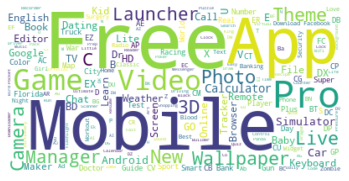

In [206]:
# Chart - 1 visualization code
text2 = " ".join(title for title in df.App)
 
# Creating word_cloud with text as argument in .generate() method

word_cloud2 = WordCloud(collocations = False, background_color = 'white').generate(text2)

# Display the generated Word Cloud

plt.imshow(word_cloud2, interpolation='bilinear')

plt.axis("off")

plt.show()

##### 1. Why did you pick the specific chart?

Tag Clouds is a visualization technique for texts that are natively used for visualizing the tags or keywords from the data source. These keywords are single words that depict the context of the whole document. These words are clustered together to form a word cloud
Word Clouds came out to be a game-changer visualization technique for understanding and determining patterns and evolving trends. 
Each word has a variable font size and colour tone. Thus this representation helps to determine words of prominence.  The bigger font size of a word portrays its prominence more relative to other words in the cluster. The frequency of words defines the shape and size of the word.



##### 2. What is/are the insight(s) found from the chart?

Insights: 
* Mostly Free app is used and the trend nowadays
* The most used app types are Game, Mobile, Photo, live, camera etc
 



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* It can be seen that most free apps are used. It can lead the business to downgrade if everybody wants to use the free app then it will be impossible for any organization to earn profit.
* Mostly used apps are associated with gaming, mobile, photo, live, camera, chat and so on. This kind of app shows that social networking apps will be mostly used in the present and future.
 



#### Chart - 2 **Best App**

There are no criteria to find the best app so we will be grouping the app which is downloaded more than 1 billion times than these apps sorted by **Rating**
 



In [207]:
# grouping the App and Installs
top=  df.groupby(['App','Rating','Type','Sub_genres'], as_index=False).agg({"Installs": "max","Rating":'max'})
# sorting the top by install in decending order
top.sort_values(by = 'Installs',ascending = False,inplace = True)
top.sort_values(by = 'Rating',ascending = False,inplace = True)

In [208]:
# we are taking the app which has been downloaded most_numbers of times
max_downloaded =  top['Installs'].max()
billion_installs = len(top[top['Installs'] == max_downloaded])
print(f"There are {billion_installs} number of app downloaded more than {max_downloaded} times")

There are 20 number of app downloaded more than 1000000000 times


In [209]:
# Taking the app which has max_downloaded i.e < billion
best_app = top[top['Installs'] == max_downloaded]
print(" A billion downloaded app has average rating of ", df['Rating'].mean())


 A billion downloaded app has average rating of  4.176684397163121


In [210]:
# Lets take a look 
best_app.head()

,App,Type,Sub_genres,Installs,Rating
4237,Instagram,Free,Social,1000000000,4.5
6554,Subway Surfers,Free,Arcade,1000000000,4.5
3838,Google Photos,Free,Photography,1000000000,4.5
3813,Google,Free,Tools,1000000000,4.4
7383,WhatsApp Messenger,Free,Communication,1000000000,4.4


In [211]:
#best app category
best_app['Sub_genres'].value_counts()

Communication              6
Social                     3
Travel & Local             2
Video Players & Editors    2
Arcade                     1
Photography                1
Tools                      1
Productivity               1
Entertainment              1
Books & Reference          1
News & Magazines           1
Name: Sub_genres, dtype: int64

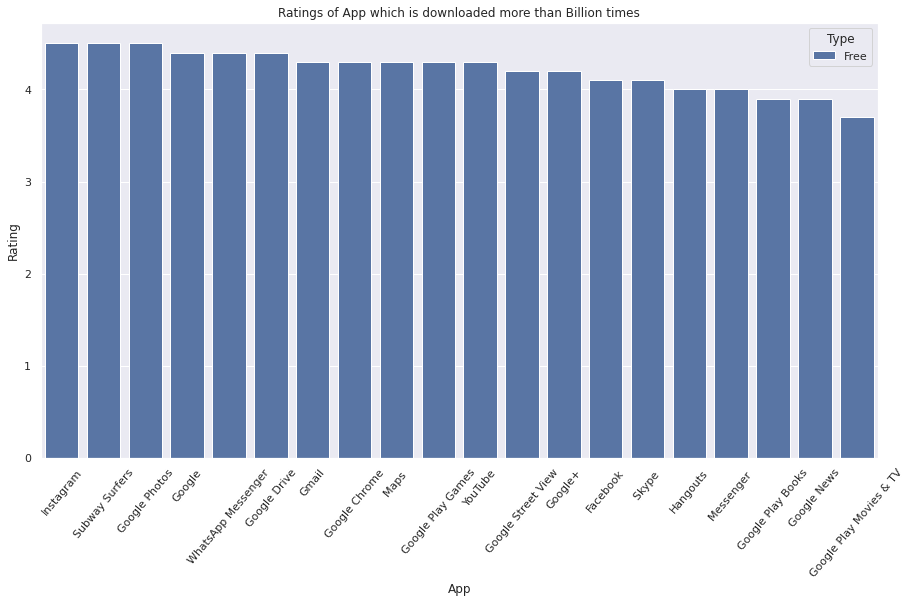

In [212]:
# Chart - 2 visualization code
# dimension of figure
plt.rcParams['figure.figsize'] = (15, 8)
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.facecolor'] = '#00000000'
# bar plot visualization
sns.barplot(data = best_app,x = 'App',y= 'Rating', hue = 'Type')
# title
plt.title('Ratings of App which is downloaded more than Billion times')
plt.xticks(rotation = 50)
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is a statistical approach to represent given data using vertical and horizontal rectangular bars. The length of each bar is proportional to the value they represent. It is basically a graphical representation of data with the help of horizontal or vertical bars with different heights. In real life, bar graphs are mainly used in the corporate sector.

##### 2. What is/are the insight(s) found from the chart?

These bar charts represent all the apps downloaded 1 billion times that are free and they have a better rating. Its average rating is 4.2 Most rated apps are Instagram, Subway Surfers and Google Photos which is 4.5.
 



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, It gives the simple knowledge that if we want our app to be downloaded most then it must be free. Its main purpose should be used for Communication, Social Networking or Travel & Local and video players & Editors
 



#### Chart - 3 Top Category vs Broad Genres vs Sub Genres 

In [213]:
# Chart - 3 visualization code
# Getting the top values and top index i.e name 
value_category =df.Category.value_counts()[:20].values
index_category =df.Category.value_counts()[:20].index

# Getting the top values and top index i.e name
value_board =df.Genres_board.value_counts()[:20].values
index_board =df.Genres_board.value_counts()[:20].index

# Getting the top values and top index i.e name
value_sub_genres =df.Sub_genres.value_counts()[:20].values
index_sub_genres =df.Sub_genres.value_counts()[:20].index

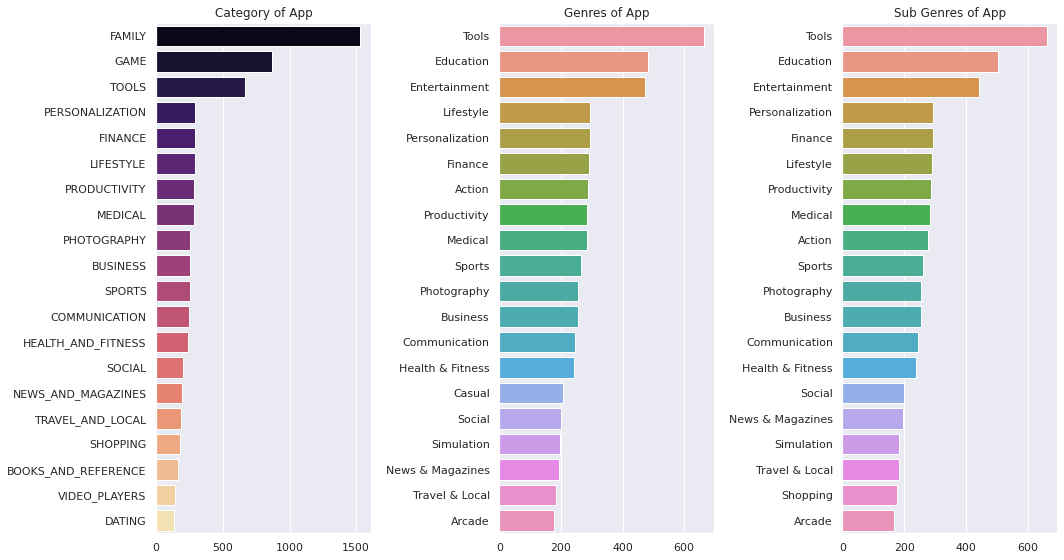

In [214]:
# Defining figure size, and number of sub figure
fig,axes = plt.subplots(figsize=(15,8),nrows=1,ncols=3)
#Creating the barplot in axes[0]
sns.barplot(x = value_category, y = index_category, 
            ax=axes[0],palette = 'magma');
axes[0].set_title('Category of App')
#Creating the barplot in axes[1]
sns.barplot(x= value_board, y=index_board,
            ax=axes[1])
axes[1].set_title('Genres of App')
#Creating the barplot in axes[2]
sns.barplot(x =value_sub_genres ,y = index_sub_genres,ax = axes[2])
# Setting the title
axes[2].set_title("Sub Genres of App")
fig.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A subplot has been chosen because it can only show multiple bar graphs to compare each graph i.e bar graph Category, Genres and Sub Genres. A bar chart is a statistical approach to representing given data using vertical and horizontal rectangular bars. The length of each bar is proportional to the value they represent. It is a graphical representation of data with the help of horizontal or vertical bars with different heights. In real life, bar graphs are mainly used in the corporate sector.
 



##### 2. What is/are the insight(s) found from the chart?

This graph shows the top 20 categories, genres, and subgenres. 
  * Family is the top category of the app
  * Tools are the top Genres and subgenres.
  * Though most of the values match each other they are not the same.
  * Dating category is the least used app in the top 20.
  * Arcade category is the least-used app in the top 20.
 



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This graph makes us confused which is the drawback of this graph as the category's value does not match with two other genres. As we can see the top category is "Family" but genres and subgenres show Tools is the most used genre. So family and tools are not fully similar.
 



#### Chart - 4 Top Category by install
Most popular category, by number of installs

In [215]:
# grouping Category by Installs
top_category = df.groupby('Category',as_index = False).agg({'Installs':'sum'})
# Filtering the total Installed greater than billion
top_category = top_category[top_category.Installs > 1e+09]

In [216]:
##top_category = top_category[top_category.Installs > 1.884201e+09]
top_category

,Category,Installs
3,BOOKS_AND_REFERENCE,1654741650
6,COMMUNICATION,11037845530
9,ENTERTAINMENT,2113660000
11,FAMILY,4336010690
14,GAME,13835094947
15,HEALTH_AND_FITNESS,1072906220
21,NEWS_AND_MAGAZINES,2366948150
23,PERSONALIZATION,1432191930
24,PHOTOGRAPHY,4634042130
25,PRODUCTIVITY,5678499080


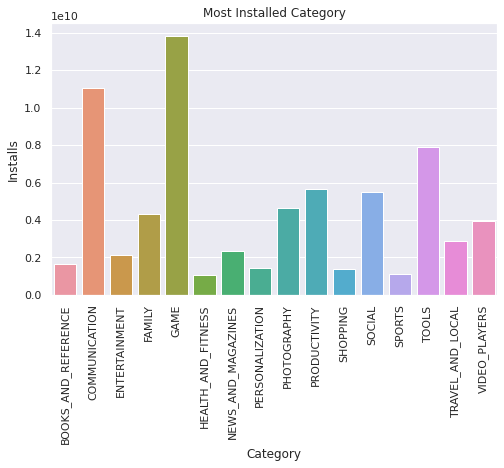

In [217]:
#setting the dimension of the figure
plt.figure(figsize = (8,5))
# setting up the color patterns
sns.axes_style("darkgrid")
# visualizing the barplot of Category by Installs
sns.barplot(x = "Category", 
            y = "Installs", 
            data = top_category )
# setting up the title
plt.title("Most Installed Category")
#angle of the xtick
plt.xticks(rotation = 90)

plt.show()

##### 1. Why did you pick the specific chart?

As a bar chart is a statistical approach to representing given data using vertical and horizontal rectangular bars. The length of each bar is proportional to the value they represent. It is a graphical representation of data with the help of horizontal or vertical bars with different heights. 
 



##### 2. What is/are the insight(s) found from the chart?

Insight:
* Most popular category is Games Followed by communication and tools.
* less installed categories are Sports, Health and fitness, Shopping and so on  
 



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This chart concludes that the developer should focus more on gaming as it is the most popular category followed by communication and tools. There is a high chance that it can be popular.
 



#### Chart - 5 The number of App present in  category

In [218]:
# Chart - 5 visualization code
app_in_category = df.groupby("Category",as_index=True)["App"].count().sort_values(ascending=False).reset_index().head(10)
app_in_category

,Category,App
0,FAMILY,1532
1,GAME,871
2,TOOLS,663
3,PERSONALIZATION,293
4,LIFESTYLE,292
5,FINANCE,292
6,PRODUCTIVITY,286
7,MEDICAL,283
8,PHOTOGRAPHY,255
9,SPORTS,254


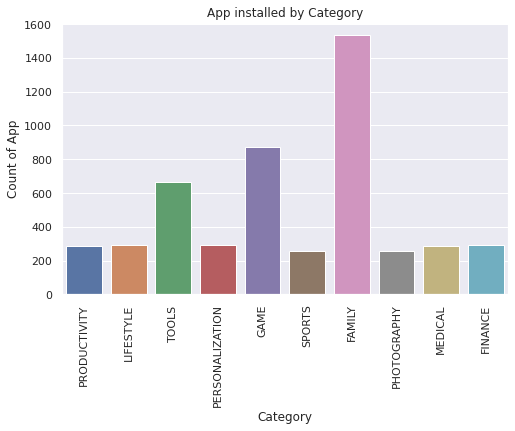

In [219]:
#setting the dimension of the figure
plt.figure(figsize = (8,5))
# setting up the color patterns
sns.axes_style("darkgrid")
# visualizing the barplot of Category by Installs
sns.barplot(x = "Category", 
            y = "App", 
            # brings the randomness in the given data
            data = app_in_category.sample(10) )
# setting up the title
plt.title("App installed by Category")
#angle of the xtick
plt.xticks(rotation = 90)
plt.ylabel("Count of App")

plt.show()

##### 1. Why did you pick the specific chart?

As a bar chart is a statistical approach to representing given data using vertical and horizontal rectangular bars. The length of each bar is proportional to the value they represent. It is a graphical representation of data with the help of horizontal or vertical bars with different heights. 
 



##### 2. What is/are the insight(s) found from the chart?

* Family category has the most number of apps which is more than 1500
* The Game Category has the 2nd most number of apps.
* Sports, Medical and Photography have the least count of app
 



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Though there is more of the app in the Family Category it is not installed as compared to the Game. So developers should focus on the Game category as it has more apps and is also installed.
 
 



#### Chart - 6 Size vs Price

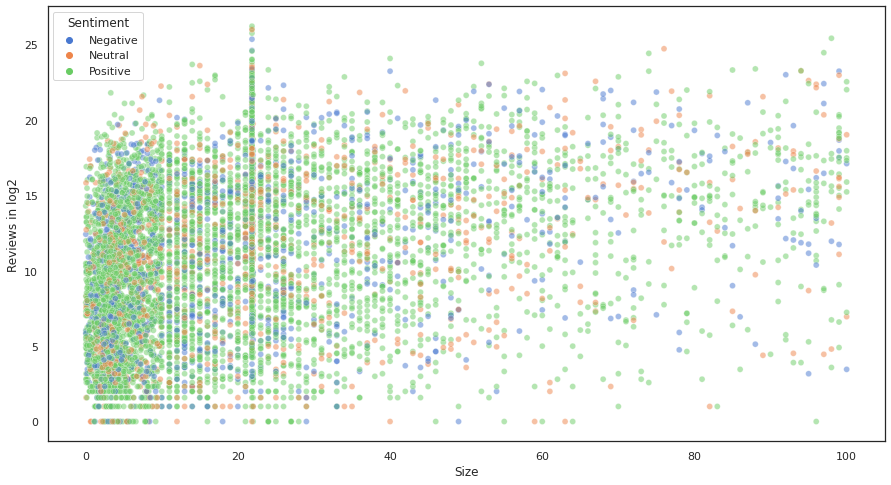

In [220]:
# Chart - 6 visualization code
sns.set_theme(style="white")
# it has huge value so applying log with base 2
df['Reviews in log2']=  np.log2(df['Reviews'])

# Plot miles per gallon against horsepower with other semantics
sns.scatterplot(x="Size", y="Reviews in log2", hue=merged_df['Sentiment'], alpha=.5, palette="muted",data=df)
# droping Reviews in log2
df.drop('Reviews in log2',inplace = True,axis = 1)

##### 1. Why did you pick the specific chart?

Scatter plots are used to plot data points on a horizontal and a vertical axis in an attempt to show how much one variable is affected by another. Each row in the data table is represented by a marker whose position depends on its values in the columns set on the X and Y axes. So size and review are just plotted to see if there is any relationship.
 



##### 2. What is/are the insight(s) found from the chart?

Apps having low sizes get more ratings.
 



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

While creating any play store app, It should be in mind to lower the size to get more reviews i.e 0 to 10 Mb

#### Chart - 7 FacetGrid of Content's Subset Category


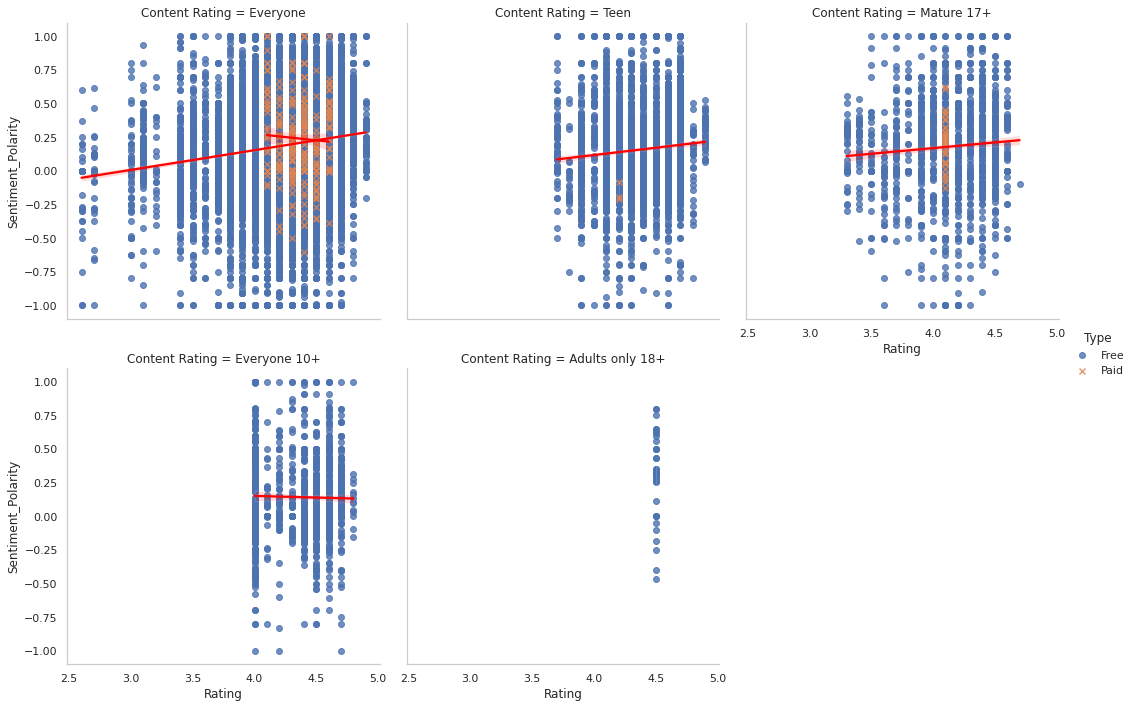

In [221]:
# Chart - 7 visualization code
sns.set_style("whitegrid", {'axes.grid' : False})
sns.lmplot(x='Rating',
           y='Sentiment_Polarity',
           data=merged_df,
           col="Content Rating",
           hue="Type",
           markers =['o','x'],
           col_wrap=3,
           line_kws={'color': 'red'})


##### 1. Why did you pick the specific chart?

Lmplot is used to draw a scatter plot onto a FacetGrid. So to get the face of the content rating we used this and took Sentiments into the data points.Lmplot can visualize linear relationships among subsets of a larger data structure
 



##### 2. What is/are the insight(s) found from the chart?

* As content rating(restriction) increases the age, the Rating keeps on increasing. Smaller rating apps decrease.
* Paid content has mostly more than a 4.2 rating
* In Content-Type "Adults only 18+" has only a 4.5 rating.
* In content Type "Everyone 10+" has a rating starting from the 4.0
* There is not a single paid app for "adults only 18+" and "Everyone 10 +"  paid apps.
 



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

If we don't want to develop any app which has a lower rating then we need to move to adult content. But it gives the drawback of having the least installed and unpaid app. The developer should focus on the app which is used by everyone to get more ratings and can also sell them
 



#### Chart - 8 Most popular Content Rating

In [222]:
# grouping the content rating by type
top_content = df.groupby('Content Rating')['Type'].count()

#top_content.sort_values(by = 'Type',ascending = False,inplace = True)
top_content

Content Rating
Adults only 18+       3
Everyone           6362
Everyone 10+        296
Mature 17+          346
Teen                888
Unrated               1
Name: Type, dtype: int64

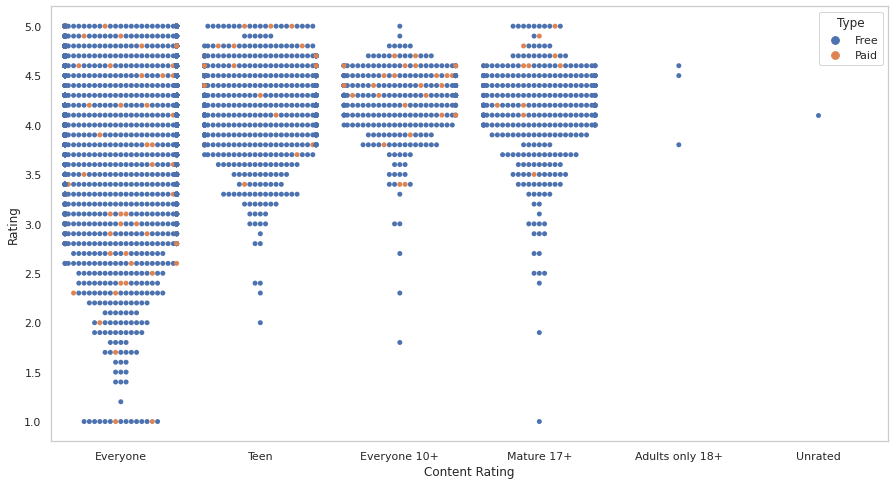

In [223]:
# Chart - 8 visualization code
sns.swarmplot(data = df, x = 'Content Rating', y = "Rating",hue = 'Type')

##### 1. Why did you pick the specific chart?

The Swarm plot is very similar to a strip plot, yet the locations of points are adjusted automatically to avoid overlap even if the jitter values are not applied.
 



##### 2. What is/are the insight(s) found from the chart?

Insights:
 
* Most rating is the 'Everyone' rated content type followed by "Teen".
* Most rated are mostly free.
* Most unrated type "Unrated" is the least rated content type followed by "Adults only 18+" 
 



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It can help in choosing the better app. It suggests that chances of getting more ratings as there must be less age restriction. As the age restriction keep on increasing the rating of the app falls.
 



#### Chart - 9 Decoding rating
Comparing it with Reviews, size, Install and with price

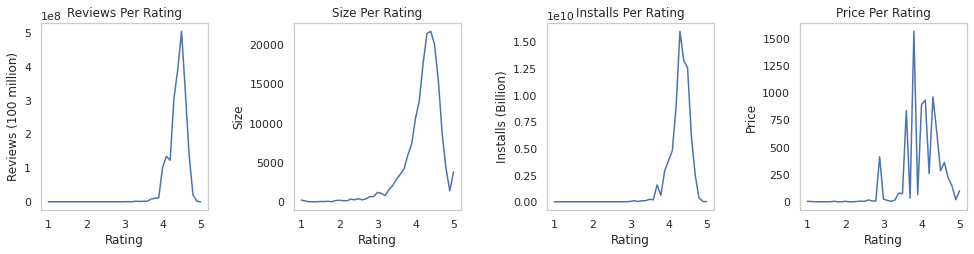

In [224]:
# Chart - 9 visualization code
# plot the graphs of reviews, size, installs and price per rating
rating_df = df.groupby('Rating').sum().reset_index()

fig, axes = plt.subplots(1, 4, figsize=(14, 4))

axes[0].plot(rating_df['Rating'], rating_df['Reviews'])
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Reviews (100 million)')
axes[0].set_title('Reviews Per Rating')

axes[1].plot(rating_df['Rating'], rating_df['Size'])
axes[1].set_xlabel('Rating')
axes[1].set_ylabel('Size')
axes[1].set_title('Size Per Rating')

axes[2].plot(rating_df['Rating'], rating_df['Installs'])
axes[2].set_xlabel('Rating')
axes[2].set_ylabel('Installs (Billion)')
axes[2].set_title('Installs Per Rating')

axes[3].plot(rating_df['Rating'], rating_df['Price'])
axes[3].set_xlabel('Rating')
axes[3].set_ylabel('Price')
axes[3].set_title('Price Per Rating')

plt.tight_layout(pad=2)
plt.show()

##### 1. Why did you pick the specific chart?

The plot() function is used to draw points (markers) in a diagram. By default, the plot() function draws a line from point to point. The function takes parameters for specifying points in the diagram. Parameter 1 is an array containing the points on the x-axis. So we are connecting each point of rating to others.
 



##### 2. What is/are the insight(s) found from the chart?

Insights:
* Apps having a rating in the range of 4 to 5 has the most reviews, are more bulk in size, are installed more and priced is high 
 



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The better rating apps are downloaded more and don't matter if it's costly or heavy in size.
So the focus should always be on making a better app. So that it can get a nice rating.
 



#### Chart - 10 The share of app in Sub Genre

In [225]:
# conting the values of each types in Sub_genres 
share_df = df.Sub_genres.value_counts()
#reseting the  of indexes
share_df = share_df.reset_index()
#renaming the columns as it has been reseted
share_df.rename(columns= {'index':'Sub_genres',
                          'Sub_genres': 'count'},
                inplace = True)

total_genres = len(share_df['Sub_genres'])
print(f"Total number of sub Genres is: {total_genres}")

Total number of sub Genres is: 52


It will be too difficult to visualize the 48 Genres. So we will group the least used genres to the other for better data comparison and evaluation


In [226]:
# changing least used genres to other i.e 200
#loop for row iteration
for i in range(total_genres):
  # checking if count is smaller than 200
  if share_df.iloc[i,1] < 200:
    share_df.iloc[i,0] = 'Other'
  else:
    #do nothings
    pass

In [227]:
# again grouping by the "Sub_genres" and by sum of the "count"
share_df = share_df.groupby('Sub_genres').agg({'count': 'sum'}).reset_index()
#sorting values by count
share_df.sort_values(by = 'count', ascending = False,inplace  = True)
length = len(share_df)
print(f"Sub genres has shrinked to {length}")
print(f"Other contain {total_genres-length} number of the sub-genres")


Sub genres has shrinked to 16
Other contain 36 number of the sub-genres


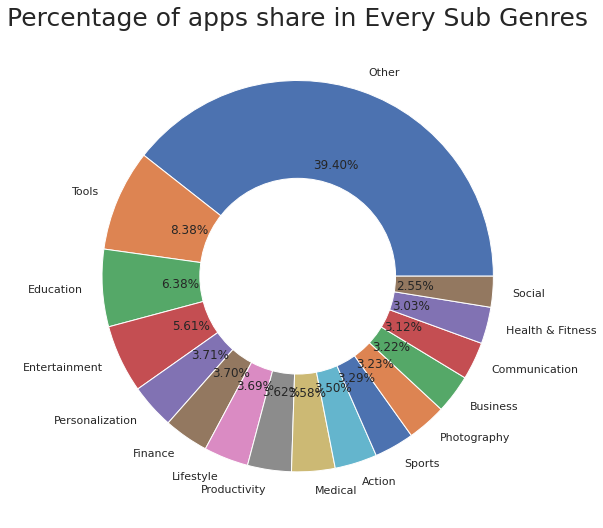

In [228]:
# Chart - 10 visualization code
# Percentage of apps belonging to each category in the playstore
plt.figure(figsize=(9,9))
# ploting the pie chart
plt.pie(share_df['count'], labels=share_df['Sub_genres'], autopct='%1.2f%%')
my_circle = plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Percentage of apps share in Every Sub Genres', fontsize = 25)
plt.show()

1. Why did you pick the specific chart?

Donut charts are the most commonly used charts. They are divided into segments, the arc of each segment shows the proportional value of each piece of data.
This chart is similar to the pie chart.
This chart is excellent at showing the relational proportion between data.
 
 


##### 2. What is/are the insight(s) found from the chart?

Insights from the donut charts are:
* Tool is the sub-genres types app used mostly though *Other* contributed around 39.40 % and it consists of 36 small genres.
* Second most used subgenre is Education followed by Entertainment and personalization
* least used genres Social and Health & Fitness
 
 


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Around 40% of the sub-genres types have less than 200 apps. More apps should be developed based on the total category. It shows the trends that developers like to build the tools, Educational and Entertainment types.
 
 


#### Chart - 11 Distribution of App
On the basis of their rating, size and type Tri-varaint analysis

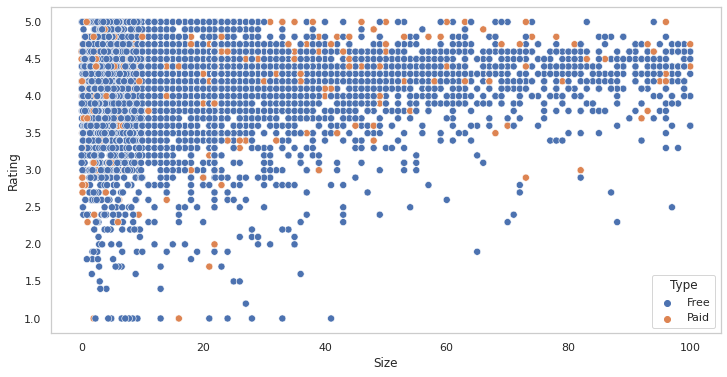

In [229]:
# Chart - 11 visualization code
# show the distribution of apps in term of their rating, size and type
plt.figure(figsize=(12, 6))
# ploting scatteringplot
sns.scatterplot(df['Size'],
               df['Rating'],
               hue=df['Type'],
               s=50)

##### 1. Why did you pick the specific chart?

Scatter plots are used to plot data points on a horizontal and a vertical axis in an attempt to show how much one variable is affected by another. Each row in the data table is represented by a marker whose position depends on its values in the columns set on the X and Y axes. So size and review are just plotted to see if there is any relationship.
 



##### 2. What is/are the insight(s) found from the chart?

Insights:
* Paid apps mostly have a high rating.
* Mostly Free app is low in size but paid app seems to have more sizes
* As size is slightly proportional to the rating
* Free app has more ratings than the paid one.
 
 


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It suggests the play store app should be low in size if we want to achieve a rating. But if it needed a high rating then its size needed to be high and costly.
 
 


#### Chart - 12 Review by size and Type

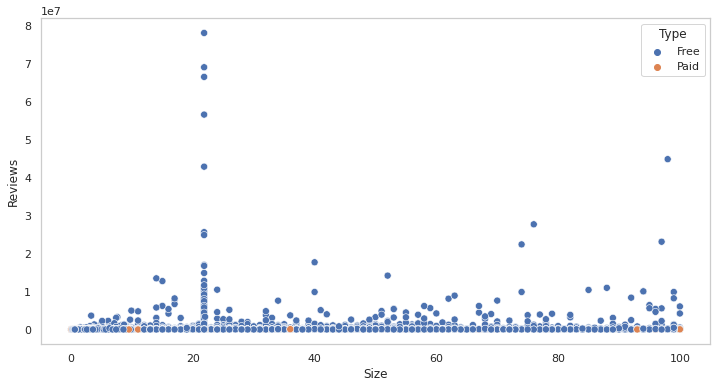

In [230]:
# Chart - 12 visualization code
# Chart - 11 visualization code
# show the distribution of apps in term of their rating, size and type
plt.figure(figsize=(12, 6))
sns.scatterplot(df['Size'],
               df['Reviews'],
               hue=df['Type'],
               s=50)

##### 1. Why did you pick the specific chart?

A Scatter plot is used when you need to compare data sets against each other to see if there is a relationship. Scatter plots are a way of visualizing the relationship; by plotting the data points you get a scattering of points on a graph. The analysis comes in when trying to discern what kind of pattern – if any – is present. And what that pattern means. Scatter Diagrams are used to show the “cause-and-effect” relationship between two kinds of data, and to provide more useful information about a production process.
 
 


##### 2. What is/are the insight(s) found from the chart?

Insights
* Reviews and sizes have very less correlation
* Paid apps get very less review
* Apps that are close to 20 Mb get more reviews.
* App in bulk size have more reviews
 
 


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* App should be near 20 Mb as the distribution shows it has a high chance of getting reviews.
* Paid apps seldom get reviews.
* Apps in bulk size have more chances to get reviewed.
 
 


#### Chart - 13 Visualization of the category on the basis of type with most download

In [231]:
# Chart - 13 visualization code
#Category wise free and paid app installs count
categoty_type_installs_df = df.groupby(['Category','Type'])[['Installs']].sum().unstack().reset_index()
categoty_type_installs_df = categoty_type_installs_df[~categoty_type_installs_df['Installs']['Paid'].isna()].set_index('Category')
categoty_type_installs_df

Installs            
Type                         Free        Paid
Category                                     
ART_AND_DESIGN       1.142171e+08     16000.0
AUTO_AND_VEHICLES    5.297430e+07     50000.0
BOOKS_AND_REFERENCE  1.654719e+09     22650.0
BUSINESS             6.866055e+08    212660.0
COMMUNICATION        1.103651e+10   1340000.0
DATING               1.407863e+08     11100.0
EDUCATION            3.512500e+08    502000.0
ENTERTAINMENT        2.113460e+09    200000.0
FAMILY               4.315496e+09  20515130.0
FINANCE              4.545577e+08    180600.0
FOOD_AND_DRINK       2.116028e+08     60000.0
GAME                 1.381432e+10  20778062.0
HEALTH_AND_FITNESS   1.072433e+09    473000.0
LIFESTYLE            4.858519e+08   1179110.0
MAPS_AND_NAVIGATION  5.031265e+08    121100.0
MEDICAL              3.607398e+07    557500.0
NEWS_AND_MAGAZINES   2.366943e+09      5500.0
PARENTING            3.105601e+07     50100.0
PERSONALIZATION      1.428934e+09   3257520.0
PHOTOGRAPHY          4.632264e+09   1778520.0
PRODUCTIVITY         5.677588e+09    910810.0
SHOPPING             1.390315e+09     10100.0
SOCIAL               5.487775e+09      6000.0
SPORTS               1.084168e+09   1243700.0
TOOLS                7.900380e+09   1698670.0
TRAVEL_AND_LOCAL     2.894566e+09    182000.0
VIDEO_PLAYERS        3.926701e+09     71000.0
WEATHER              3.602850e+08    811500.0

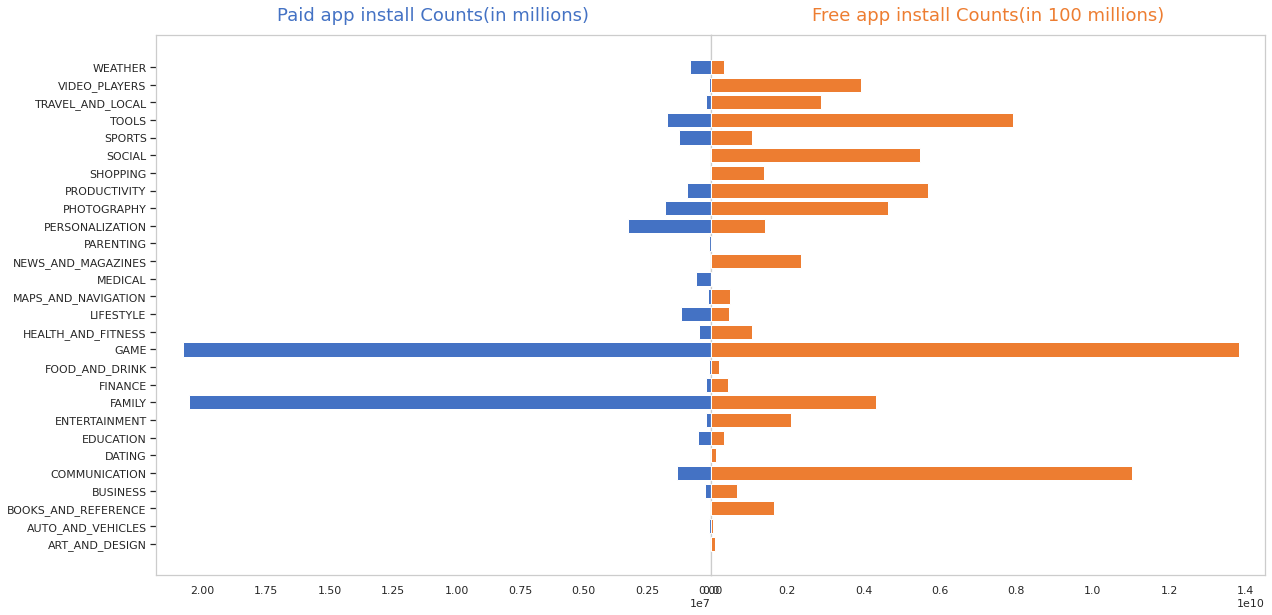

In [232]:
#Plot between Paid and Free installed app counts
# getting the index
ind = categoty_type_installs_df.index
# column value of the paid
col_0 = categoty_type_installs_df['Installs']['Paid']
# column value of the free
col_1 = categoty_type_installs_df['Installs']['Free']

title_0 = 'Paid app install Counts(in millions)'
title_1 = 'Free app install Counts(in 100 millions)'

# Setting up the subplots i.e with 2 columns
fig, axes = plt.subplots(figsize=(20,10), ncols=2, sharey=True)
# set tight layout 
fig.tight_layout()

# visulaization of bar graph horizontally with paid type
axes[0].barh(ind, col_0, align='center', color='#4472c4', zorder=10)
# setting up the Title of free type
axes[0].set_title(title_0, fontsize=18, pad=15, color='#4472c4')

# visualaization of the bar graph horizontally with the free types
axes[1].barh(ind, col_1, align='center', color='#ed7d31', zorder=10)

# setting p the tilte of  paid type
axes[1].set_title(title_1, fontsize=18, pad=15, color='#ed7d31')
    
# If you have positive numbers and want to invert the x-axis of the left plot
axes[0].invert_xaxis() 


axes[0].set(yticks=ind, yticklabels=ind)
axes[0].yaxis.tick_left()

plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)

##### 1. Why did you pick the specific chart?

We have used the multiple horizontal bar graph with inverted axes in the subplot because it gives the power to compare the two elements simultaneously with the third in hue. So that we can get insight from multiple variables at once.
 
 


##### 2. What is/are the insight(s) found from the chart?

Insights: 
* Game is the most installed paid app followed by the Family app Category.
* Free Games are installed most followed by communication.
* Games are the most preferred type with free and paid subscriptions.
 
 


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Developers need to create the gaming application because its user loves the game whether it is free or paid. Also need to focus on the Family app because it is mostly a paid app.
 
 


#### Chart 14 Sentiment analysis
Positive, Negetive and Neutral by Reviews

In [233]:
# Creating the three sub dataset with the positive, Negetive and Neutral
Positive_df = rdf[rdf['Sentiment']=='Positive']
Negative_df = rdf[rdf['Sentiment'] == 'Negative']
Neutral_df = rdf[rdf["Sentiment"] == 'Neutral']
# Creating the list of different sentiment
df_list = [Positive_df,Negative_df,Neutral_df]

In [234]:
# Function to generate the cloud of words
def topicWordCloud(dataset):
  text2 = " ".join(title for title in dataset.Translated_Review)
 
# Creating word_cloud with text as argument in .generate() method

  word_cloud2 = WordCloud(collocations = False, background_color = 'white').generate(text2)
  return word_cloud2

(-0.5, 399.5, 199.5, -0.5)

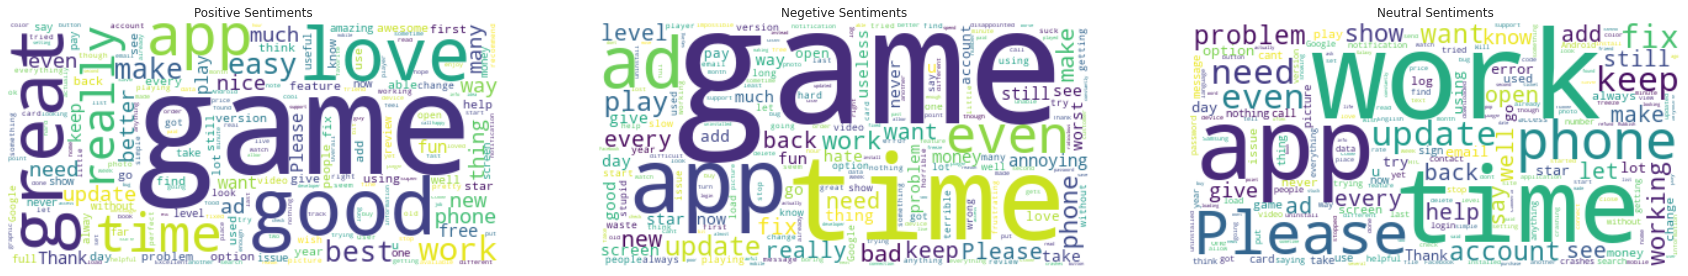

In [235]:
# Defining the figure dimension, and axes
fig, (ax1,ax2,ax3) = plt.subplots(figsize=(30,30),nrows=1,ncols=3)

# cloud visualization of the Positive 
ax1.imshow(topicWordCloud(df_list[0]),interpolation='bilinear')

# cloud visualization of the Negative
ax2.imshow(topicWordCloud(df_list[1]),interpolation='bilinear')

# cloud visualizatin of the Neutral
ax3.imshow(topicWordCloud(df_list[2]),interpolation='bilinear')

# setting the title for positive sentiments
ax1.set_title('Positive Sentiments')
ax1.axis('off')
# setting the title for negetive
ax2.set_title('Negetive Sentiments')
ax2.axis('off')
# setting the title for the neutral
ax3.set_title('Neutral Sentiments')
ax3.axis('off')

##### 1. Why did you pick the specific chart?

To get the visualization of words of a cloud of the particular sentiment, this chart is used. The most frequent words are bigger & bolder than others and also more important than others. This chart is very useful in the analysis of text and sentiment analysis.
 
 


##### 2. What is/are the insight(s) found from the chart?

Insights:
* In positive and Negative games it is most used.
* in positive good, great, best, time etc are mostly used in reviews
* In Negative sentiments time, app, bad, phone, even, app are mostly used in reviews to determine it.
* In Neutral sentiments, the most used words are phone, app, work, please, keep, and time are mostly used in reviews.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

 
It tells what are the things which make them a bad review, good review and Neutral review. So we need to work more on the negative, and neutral feedback
 
 
 
 


#### Chart 15 Feedback analysis according to the sentiments.

In [236]:
#groping the category and sentiment and reseting the index to sentiment count
category_sentiment = merged_df.groupby(['Category','Sentiment']).size().reset_index(name='Sentiment Count')
# taking th log of sentiment count
category_sentiment['log_sentiment_count'] = np.log2(category_sentiment['Sentiment Count'])

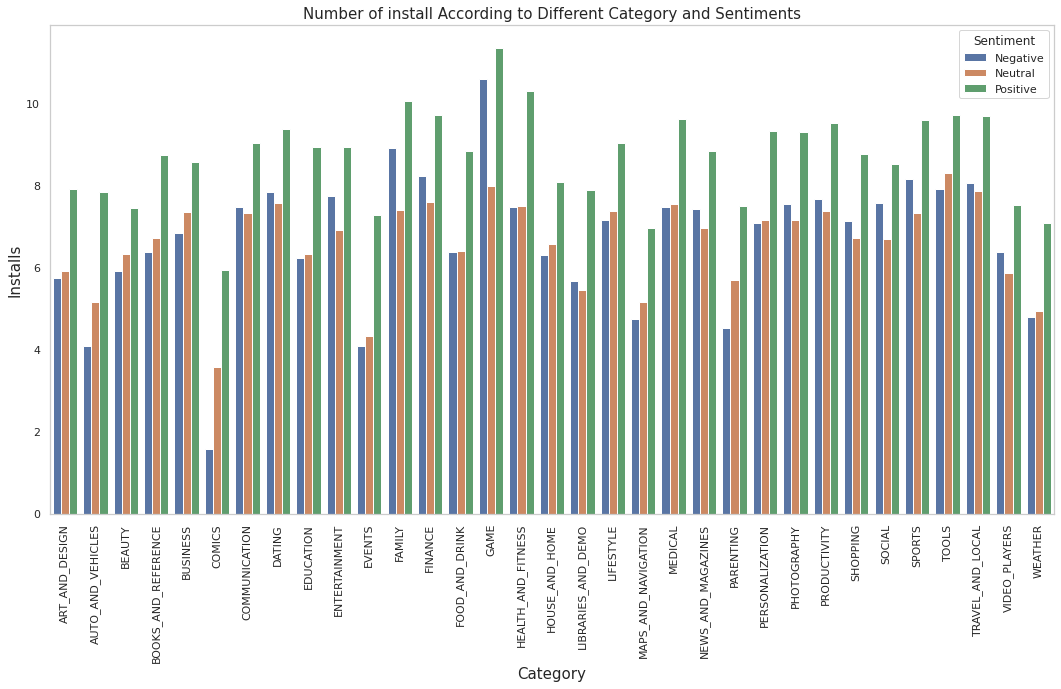

In [237]:
# Defining the chart dimension
plt.figure(figsize=(18,9))
# ploting the bar graph across different category with the sentiment in hue
sns.barplot('Category', 'log_sentiment_count', hue='Sentiment', data=category_sentiment)

plt.title("Number of install According to Different Category and Sentiments",fontsize=15)
plt.xticks(rotation=90,fontsize=11)
plt.xlabel("Category", fontsize=15)
plt.ylabel("Installs", fontsize=15)
plt.show()


##### 1. Why did you pick the specific chart?

This graph is chosen because it can visualize the category on the x-axis and its size on the y-axis and also different sentiments can also be represented at the same time. Each bar represents the value of that category.

##### 2. What is/are the insight(s) found from the chart?

Insights: 
* Game has the most positive sentiments and also the most negative sentiments.
 
* Tools have the most neutral sentiments.
* Comics have the least number of positive, negative and neutral sentiments.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

If a developer is developing any comics app then he needs to make a more beautiful app with better content because comics are the worst category according to the analysis.

#### Chart 16 Relationship between the sentiment subjectivity and Sentiment polarity

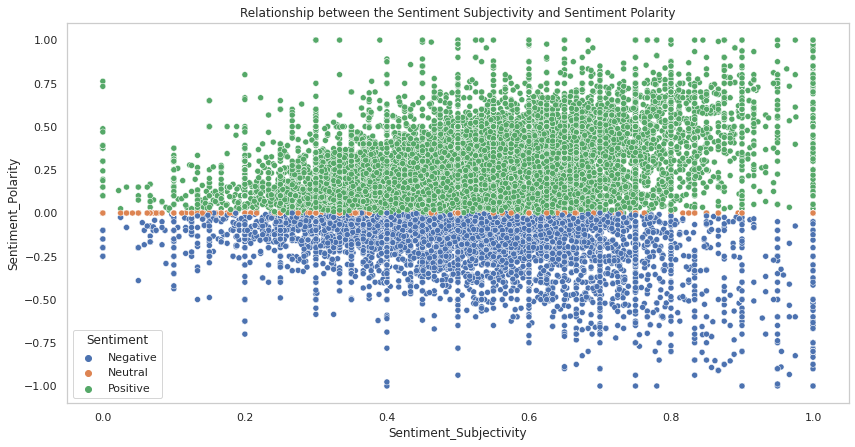

In [238]:
# Relationship between the sentiment subjectivity and sentiment polaity
plt.figure(figsize=(14,7))
sns.scatterplot(merged_df['Sentiment_Subjectivity'], merged_df['Sentiment_Polarity'],merged_df['Sentiment'])
plt.title("Relationship between the Sentiment Subjectivity and Sentiment Polarity")
plt.show()

##### 1. Why did you pick the specific chart?

 
A scatter plot is a type of plot or mathematical diagram using Cartesian coordinates to display values for typically two variables for a set of data.
This graph is chosen just because we want to see the relationship between Sentiment_ subjectivity and Sentiment_polarity and these points will be classified to the nature of the sentiments i.e Negative and positive


##### 2. What is/are the insight(s) found from the chart?

As the polarity has a dual relationship with sentiment subjectivity. As polarity increases positive sentiment increases, as it decreases negative sentiment decrease and neutral does not get affected by anything

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

 
We need to focus to change the negative reviews in the future by working on them or at least bringing them to neutral.


#### Chart - 17 - Correlation Heatmap

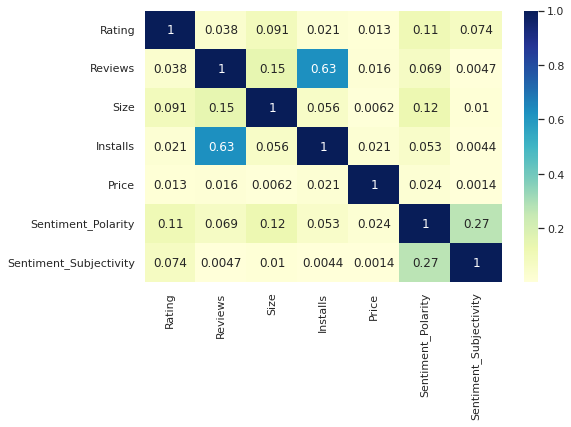

In [239]:
# Correlation Heatmap visualization code
# plotting correlation heatmap
plt.figure(figsize=(8,5))
correlation = merged_df.corr()
dataplot = sns.heatmap(abs(correlation),cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

##### 1. Why did you pick the specific chart?

Correlation heatmaps are that kind of plot which visualize the strength of relationships between different numerical variables. Correlation plots are often used to understand which variables are related to each other. These are mostly used so that it can find the potential relationships between variables. The depth of colour-coding of the cells makes it easier to identify how strong the relationship is between them. It is used to find linear and non-linear relationships.

##### 2. What is/are the insight(s) found from the chart?

Insights:
 
* Install and Reviews are correlated with each other
* There is slightly or almost no relationship between each other
 
 


#### Chart - 18 - Pair Plot 

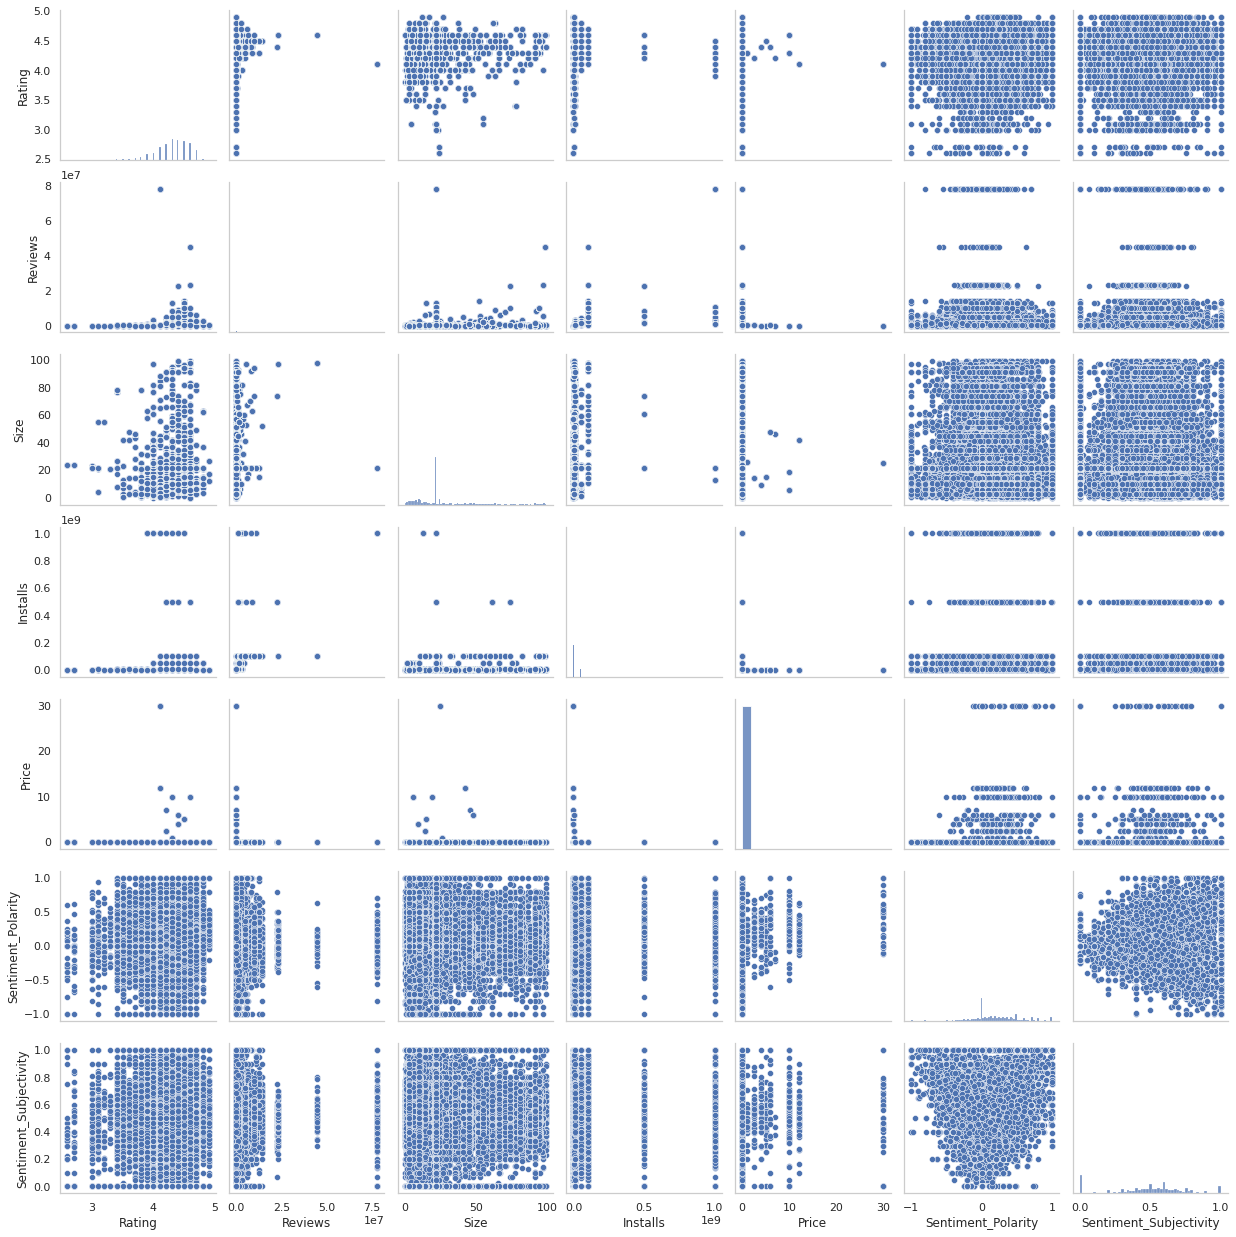

In [240]:
# Pair Plot visualization code
sns.pairplot(merged_df)

##### 1. Why did you pick the specific chart?

Pair plot allows us to plot pairwise relationships between variables within a dataset and it also creates a nice visualization and helps us understand the data by summarizing a large amount of data in a single figure. This is essential for exploring our dataset and trying to become familiar with it. So it will produce figures of all the variables present in the dataset along with the y and x axis. And diagonal shows the histogram showing the distribution of each of the variables.

##### 2. What is/are the insight(s) found from the chart?

The above charts show that every variable have a slightly linear relationship between each other and their data points and their data point are not linearly separable except for the reviews and installs.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

 
* Should develop the Gaming app.
* Should stay away from the Comic category
* Should be available to everyone instead of deploying age restriction
 
 


# **Conclusion**

* There are 20 app which has been downloaded more than a billion times has an average rating of  4.17
* Three best apps are Instagram, Subway surfers and Google Photos
* Family category has the highest number of apps.
* When more content restrictions are applied installation keeps on decreasing but the rating improves.
* Family app Category is the most downloaded paid app
* Game that is most installed has the most positive sentiments and also the most negative sentiments.
* Tool is a genres types app used mostly
* Tools has the most neutral sentiments.
* Comics have the least number of positive, negative and neutral sentiments.
* Paid app gets very less reviews but has the high rating
* App that is close to 20 Mb gets more reviews.
* App in bulk size have more reviews
* The better rating apps are downloaded more and does not matter if it's costly or heavy in size.
 
 
 


### ***Hurrah! We have successfully completed our EDA Capstone Project !!!***